# Grade infinflate at UK HEI

## 1. Aim

Perform a test of the hypothesis that the proportion of UGD with first class honour increased in 2018/19 compared to 2014/5.

## 2. Setup the notebook

### 2.1 Import the libraries

In [1]:
from statsmodels.stats.proportion import proportion_confint, proportions_ztest
from pandas import DataFrame  # for typing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

### 2.2 Load the data

In [2]:
firsts: DataFrame = pd.read_csv("..\\data\\grade-inflation.csv")

## 3. Explore the data

### 3.1 Preview the data

In [3]:
firsts.head()

,HE provider,f_2014,n_2014,f_2018,n_2018
0,The University of Stirling,265,1230,305,1790
1,University of Hertfordshire,875,4470,1150,4755
2,The University of York,800,3235,1015,3735
3,The University of Liverpool,1085,4805,1765,6635
4,The University of St Andrews,415,1565,515,1765


### 3.2 Describe the data

In [4]:
firsts.describe().T

,count,mean,std,min,25%,50%,75%,max
f_2014,156.0,523.108974,411.733293,10.0,168.75,455.0,816.25,1655.0
n_2014,156.0,2534.198718,1810.862341,45.0,1025.00,2512.5,3682.50,10170.0
f_2018,156.0,730.769231,567.598266,15.0,232.50,627.5,1101.25,2680.0
n_2018,156.0,2715.352564,1900.630635,65.0,1012.50,2560.0,3943.75,7625.0


### 3.3 Calculate the proportions

In [5]:
firsts["prop_2014"] = firsts["f_2014"]/firsts["n_2014"]
firsts["prop_2018"] = firsts["f_2018"]/firsts["n_2018"]

### 3.4 Plot the data

#### 3.4.1 Unpivot the data

In [6]:
mfirsts = firsts.melt(
    value_vars=["prop_2014", "prop_2018"],
    value_name="proportion",
    var_name="academic_year")

# relabel the variable column
mfirsts["academic_year"].replace(
    to_replace={"prop_2014": "2014", "prop_2018": "2018"},
    inplace=True)

mfirsts.head()

,academic_year,proportion
0,2014,0.215447
1,2014,0.195749
2,2014,0.247295
3,2014,0.225806
4,2014,0.265176


#### 3.4.2 Plot as a histogram

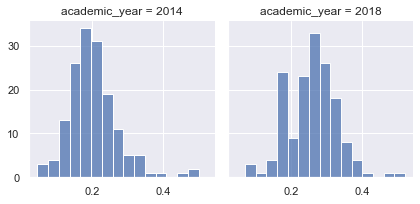

In [7]:
g = sns.FacetGrid(mfirsts, col="academic_year")
g.map_dataframe(sns.histplot, x="proportion", bins=15)
plt.show()

#### 3.4.3 Plot as boxplots

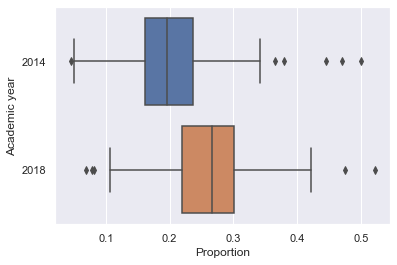

In [8]:
# plot the data
ax = sns.boxplot(
    data=mfirsts,
    x="proportion",
    y="academic_year")
ax.set(xlabel="Proportion", ylabel="Academic year")
plt.show()

## 4. Perform the hypothesis test

In [9]:
firsts[["prop_2014"]].describe().T

,count,mean,std,min,25%,50%,75%,max
prop_2014,156.0,0.202889,0.072015,0.044776,0.161262,0.195375,0.235942,0.5


In [10]:
proportion_confint(
    count=firsts["f_2014"].sum(),
    nobs=firsts["n_2014"].sum())

(0.20515822840556508, 0.20768151510310479)

In [11]:
firsts[["prop_2018"]].describe().T

,count,mean,std,min,25%,50%,75%,max
prop_2018,156.0,0.260161,0.070771,0.069767,0.218937,0.265839,0.301163,0.521739


In [12]:
proportion_confint(
    count=firsts["f_2018"].sum(),
    nobs=firsts["n_2018"].sum())

(0.26778940554766323, 0.2704605737958134)

In [13]:
proportions_ztest(
    count=firsts["f_2018"].sum(),
    nobs=firsts["n_2018"].sum(),
    value=firsts["prop_2014"].mean(),
    prop_var=firsts["prop_2014"].var())

(600.1720899098299, 0.0)